# Exploring Fuel Economy Data of 2008 and 2018
Data source: https://www.fueleconomy.gov/feg/download.shtml/

## Introduction
Fuel economy data are the result of vehicle testing done at the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers with oversight by EPA.

The 2018 and 2008 datasets for 'EPA Green Vehicle Guide` were used for this analysis. 

| Attribute | Description |
| --- | --- |
| `Model` | Vehicle make and model |
| `Displ` | Engine displacement - the size of an engine in liters |
| `Cyl` | The number of cylinders in a particular engine |
| `Trans` | Transmission Type and Number of Gears |
| `Drive` | Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)|
| `Fuel` | Fuel Type |
| `Cert Region`* | Certification Region Code |
| `Sales Area`** | Certification Region Code |
| `Stnd` | Vehicle emissions standard code |
| `Stnd Description`* | Vehicle emissions standard description |
| `Underhood ID` | This is a 12-digit ID number that can be found on the underhood emission label of every vehicle. It's required by the EPA to designate its "test group" or "engine family."
| `Veh Class` | EPA Vehicle Class |
| `Air Pollution Score` | Air pollution score (smog rating)|
| `City MPG` | Estimated city mpg (miles/gallon) |
| `Hwy MPG` | Estimated highway mpg (miles/gallon) |
| `Cmb MPG` | Estimated combined mpg (miles/gallon) |
| `Unadj Cmb MPG`* | Unadjusted combined mpg (miles/gallon) |
| `Greenhouse Gas Score` | Greenhouse gas rating |
| `SmartWay` | Yes, No, or Elite |
| `Comb CO2`* | Combined city/highway CO2 tailpipe emissions in grams per mile |
```
* Not included in 2008 dataset
** Not included in 2018 dataset
```

**Questions we can ask ourselves**

- Are more models using alternative sources of fuel? By how much?
- How much have vehicle classes improved in fuel economy?
- What are the characteristics of SmartWay vehicles?
- What features are associated with better fuel economy?
- For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

## Data Wrangling

### Assessing Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load data
fuel_08 = pd.read_csv("fuel_all_alpha_08.csv")
fuel_18 = pd.read_csv("fuel_all_alpha_18.csv")

Let's look at what's in the loaded datasets.

In [3]:
print(fuel_08.shape)
fuel_08.head()

(2404, 18)


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
print(fuel_18.shape)
fuel_18.head()

(1611, 18)


,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


**Any duplicated rows?**

In [5]:
print(fuel_08.duplicated().sum())

# percentage of duplicated rows to entire row
print(fuel_08.duplicated().sum() * 100 / fuel_08.shape[0])

25
1.0399334442595674


In [6]:
print(fuel_18.duplicated().sum())

# percentage of duplicated rows to entire row
print(fuel_18.duplicated().sum() * 100 / fuel_18.shape[0])

0
0.0


**Datatypes of columns**

In [7]:
fuel_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [8]:
# data types in each column
for i in fuel_08.columns:
      print(i, type(fuel_08[i][1]))

Model <class 'str'>
Displ <class 'numpy.float64'>
Cyl <class 'str'>
Trans <class 'str'>
Drive <class 'str'>
Fuel <class 'str'>
Sales Area <class 'str'>
Stnd <class 'str'>
Underhood ID <class 'str'>
Veh Class <class 'str'>
Air Pollution Score <class 'str'>
FE Calc Appr <class 'str'>
City MPG <class 'str'>
Hwy MPG <class 'str'>
Cmb MPG <class 'str'>
Unadj Cmb MPG <class 'numpy.float64'>
Greenhouse Gas Score <class 'str'>
SmartWay <class 'str'>


In [9]:
# number of rows with missing 
fuel_08.isnull().any(axis=1).sum()

199

In [10]:
fuel_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [11]:
# data types in each column
for i in fuel_18.columns:
      print(i, type(fuel_18[i][1]))

Model <class 'str'>
Displ <class 'numpy.float64'>
Cyl <class 'numpy.float64'>
Trans <class 'str'>
Drive <class 'str'>
Fuel <class 'str'>
Cert Region <class 'str'>
Stnd <class 'str'>
Stnd Description <class 'str'>
Underhood ID <class 'str'>
Veh Class <class 'str'>
Air Pollution Score <class 'numpy.int64'>
City MPG <class 'str'>
Hwy MPG <class 'str'>
Cmb MPG <class 'str'>
Greenhouse Gas Score <class 'numpy.int64'>
SmartWay <class 'str'>
Comb CO2 <class 'str'>


In [12]:
# number of rows with missing data
fuel_18.isnull().any(axis=1).sum()

2

**Number of unique values in each column**

In [13]:
fuel_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [14]:
fuel_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

**Type of fuels used in both datasets**

In [15]:
fuel_08.Fuel.unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [16]:
fuel_18.Fuel.unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

### Cleaning

##### Drop Extraneous columns
Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.

In [17]:
# columns in the dataset
print("Fuel 2008 Data:")
print(fuel_08.columns, "\n")
print("Fuel 2018 Data:")
print(fuel_18.columns)

Fuel 2008 Data:
Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object') 

Fuel 2018 Data:
Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')


In [18]:
# columns that are in fuel_08 but not in fuel_18
list(set(fuel_08.columns).difference(fuel_18.columns))

['Unadj Cmb MPG', 'Sales Area', 'FE Calc Appr']

In [19]:
# columns that are in fuel_18 but not in fuel_08
list(set(fuel_18.columns).difference(fuel_08.columns))

['Comb CO2', 'Cert Region', 'Stnd Description']

In [20]:
# dropping extraneous columns in fuel_08 data
extraCols_08 = ['FE Calc Appr','Unadj Cmb MPG','Stnd','Underhood ID']
fuel_08.drop(extraCols_08, axis=1, inplace=True)

In [21]:
# dropping extraneous columns in fuel_18 data
extraCols_18 = ['Stnd Description','Comb CO2','Stnd','Underhood ID']
fuel_18.drop(extraCols_18, axis=1, inplace=True)

##### Renaming columns. 

Let's change the "Sales Area" in the 2008 dataset into "Cert Region" for consistency. Also, let's replace the spaces in the column names to underscores and convert everthing to lowercase.

In [22]:
# renaming 'Sales Area' as 'Cert Region'
fuel_08.rename(columns={"Sales Area": "Cert Region"}, inplace=True)
fuel_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [23]:
# replace spaces with underscores
fuel_08.columns = fuel_08.columns.str.replace(" ", "_")
fuel_18.columns = fuel_18.columns.str.replace(" ", "_")

# convertinf names to lowercase
fuel_08.columns = fuel_08.columns.str.lower()
fuel_18.columns = fuel_18.columns.str.lower()

Let's confirm

In [24]:
fuel_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [25]:
fuel_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

##### Filter

For consistency, let's compare cars certified by California standards. Filter both datasets using `query` to select only rows where `cert_region` == `CA`. Then drop the `cert_region` columns.

In [26]:
region = 'CA'
fuel_08.query('cert_region == @region', inplace=True)
fuel_18.query('cert_region == @region', inplace=True)

# to confirm
print("fuel_08: ",fuel_08.cert_region.unique())
print("fuel_18: ", fuel_18.cert_region.unique())

fuel_08:  ['CA']
fuel_18:  ['CA']


In [27]:
# drop the cert_region for both datasets
fuel_08.drop('cert_region', axis=1, inplace=True)
fuel_18.drop('cert_region', axis=1, inplace=True)

In [28]:
fuel_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [29]:
fuel_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

##### Drop Nulls
Drop any rows in both datasets that contain missing values

In [30]:
# let's see the shape
print(fuel_08.shape)
print(fuel_18.shape)

(1084, 13)
(798, 13)


In [31]:
# drop rows with any NA
fuel_08.dropna(axis=0, inplace=True)
fuel_18.dropna(axis=0, inplace=True)

# let's see the shape again
print(fuel_08.shape)
print(fuel_18.shape)

(1009, 13)
(797, 13)


In [32]:
# check if there are null values
print(fuel_08.isna().sum().any())
print(fuel_18.isna().sum().any())

False
False


##### Dedupe Data
Drop any duplicate rows in both datasets.

In [33]:
# number of duplicates in both datasets
print('fuel_08 no of dupes: {}'.format(fuel_08.duplicated().sum()))
print('fuel_18 no of dupes: {}'.format(fuel_18.duplicated().sum()))

fuel_08 no of dupes: 23
fuel_18 no of dupes: 3


In [34]:
# dropping duplicates in both datasets
fuel_08.drop_duplicates(inplace=True)
fuel_18.drop_duplicates(inplace=True)

In [35]:
# number of duplicates in both datasets
print('fuel_08 no of dupes: {}'.format(fuel_08.duplicated().sum()))
print('fuel_18 no of dupes: {}'.format(fuel_18.duplicated().sum()))

fuel_08 no of dupes: 0
fuel_18 no of dupes: 0


In [36]:
print(fuel_08.shape)
print(fuel_18.shape)

(986, 13)
(794, 13)


##### Inspecting Datasets to Lookout for Adjustments to Make

In [37]:
fuel_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 2400
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   veh_class             986 non-null    object 
 7   air_pollution_score   986 non-null    object 
 8   city_mpg              986 non-null    object 
 9   hwy_mpg               986 non-null    object 
 10  cmb_mpg               986 non-null    object 
 11  greenhouse_gas_score  986 non-null    object 
 12  smartway              986 non-null    object 
dtypes: float64(1), object(12)
memory usage: 107.8+ KB


In [38]:
fuel_08.head(10)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes
8,ACURA TL,3.5,(6 cyl),Man-6,2WD,Gasoline,midsize car,7,18,27,21,6,yes
14,ACURA TSX,2.4,(4 cyl),Man-6,2WD,Gasoline,small car,6,19,28,22,6,no
15,ACURA TSX,2.4,(4 cyl),Auto-S5,2WD,Gasoline,small car,6,20,28,23,7,yes
18,ASTON MARTIN DB9,5.9,(12 cyl),Man-6,2WD,Gasoline,small car,6,10,16,12,0,no
19,ASTON MARTIN DB9,5.9,(12 cyl),Auto-S6,2WD,Gasoline,small car,6,11,18,13,1,no


In [39]:
fuel_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 794 non-null    object 
 1   displ                 794 non-null    float64
 2   cyl                   794 non-null    float64
 3   trans                 794 non-null    object 
 4   drive                 794 non-null    object 
 5   fuel                  794 non-null    object 
 6   veh_class             794 non-null    object 
 7   air_pollution_score   794 non-null    int64  
 8   city_mpg              794 non-null    object 
 9   hwy_mpg               794 non-null    object 
 10  cmb_mpg               794 non-null    object 
 11  greenhouse_gas_score  794 non-null    int64  
 12  smartway              794 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 86.8+ KB


In [40]:
fuel_18.head(10)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No
10,ACURA TLX AWD A-SPEC,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,20,29,23,5,No
12,ACURA TLX FWD A-SPEC,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,30,23,5,No
14,ALFA ROMEO 4C,1.8,4.0,AutoMan-6,2WD,Gasoline,small car,1,24,34,28,6,No
17,ALFA ROMEO Giulia,2.9,6.0,Auto-8,2WD,Gasoline,midsize car,3,17,24,20,4,No
22,AUDI A3,2.0,4.0,AMS-6,4WD,Gasoline,small car,7,24,31,27,6,No


In [41]:
fuel_08.air_pollution_score.unique()

array(['7', '6', '9.5', '9', '6/4'], dtype=object)

In [42]:
fuel_08.cyl.unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object)

In [43]:
fuel_08.greenhouse_gas_score.unique()

array(['4', '5', '6', '7', '0', '1', '3', '2', '8', '9', '10', '7/6'],
      dtype=object)

In [44]:
fuel_18.greenhouse_gas_score.unique()

array([ 5,  4,  6,  7,  2,  1, 10,  3,  9,  8], dtype=int64)

After inspection, the following still need to be done on the datasets.

* Extract int values from the strings in the 2008 `cyl` column.
* Convert floats to ints in the 2018 `cyl` column.
* Fixing scores and mpg entries that contain '/'.
* Convert strings to floats in the 2008 `air_pollution_score` column.
* Convert ints to floats in the 2018 `air_pollution_score` columns.
* `city_mpg`, `hwy_mpg` and `cmb_mpg` of both datasets need to be converted to floats from strings.
* For the `greenhouse_gas_score` column, that of the 2008 dataset needs to be converted from strings to ints.

##### Fixing Data Types

* Extract int values from the strings in the 2008 `cyl` column.

In [45]:
# view the unique values in the cyl column
fuel_08.cyl.value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [46]:
# Extracting int values from the strings in the 2008 dataset
fuel_08['cyl'] =  fuel_08.cyl.str.extract('(\d+)').astype(int)

# view the values again
fuel_08.cyl.value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

* Convert floats to ints in the 2018 `cyl` column.

In [47]:
fuel_18.dtypes['cyl']

dtype('float64')

In [48]:
fuel_18['cyl'] = fuel_18['cyl'].astype(int)

In [49]:
fuel_18.dtypes['cyl']

dtype('int32')

* Fixing scores and mpg entries that contain '/'.

In [50]:
# values in air_pollution_score column
fuel_08.air_pollution_score.unique()

array(['7', '6', '9.5', '9', '6/4'], dtype=object)

Notice the '6/4'? Check out air pollution score 

According to [fueleconomy.gov](https://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type.This can also be seen in the mpg columns.

Let's have a look at the samples in 2008 that are hybrids

In [51]:
hybrid_08 = fuel_08[fuel_08['fuel'].str.contains('/')]
print(hybrid_08.shape)
hybrid_08.head(15)

(1, 13)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


Let's have a look at those in 2018

In [52]:
hybrid_18 = fuel_18[fuel_18['fuel'].str.contains('/')]
print(hybrid_18.shape)
hybrid_18.head(15)

(38, 13)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


We're going to take each hybrid row, split them into two new rows and store in 2 dataframes.

* One with values for the first fuel type (values before the "/")
* The other with values for the second fuel type

In [53]:
df1 = hybrid_08.copy() # df for the first fuel type
df2 = hybrid_08.copy() # df for the second fuel type

In [54]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for col in split_columns:
      df1[col] = df1[col].apply(lambda x: x.split('/')[0])
      df2[col] = df2[col].apply(lambda x: x.split('/')[1])    

In [55]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [56]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [57]:
# combine dataframes to add to the original dataframe
new_rows = pd.concat([df1,df2])
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [58]:
# drop original hybrid rows
fuel_08.drop(hybrid_08.index, inplace=True)

# add our new rows
fuel_08 = pd.concat([fuel_08, new_rows], ignore_index=True)

In [59]:
# check to if all the hybrid rows have been replaced
fuel_08[fuel_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [60]:
fuel_08.shape

(987, 13)

Repeating this process for the 2018 dataset

In [61]:
df1 = hybrid_18.copy() # df for the first fuel type
df2 = hybrid_18.copy() # df for the second fuel type

In [62]:
# find out which columns contain "/"
for column in fuel_18.columns:
      try:
            print("{}: {}".format(column,fuel_18[column].str.contains('/').any()))
      except AttributeError:
            print("{}: {}".format(column,False))

model: True
displ: False
cyl: False
trans: False
drive: False
fuel: True
veh_class: False
air_pollution_score: False
city_mpg: True
hwy_mpg: True
cmb_mpg: True
greenhouse_gas_score: False
smartway: False


In [63]:
# columns to split by "/"
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for col in split_columns:
      df1[col] = df1[col].apply(lambda x: x.split('/')[0])
      df2[col] = df2[col].apply(lambda x: x.split('/')[1])    

In [64]:
# combine dataframes to add to the original dataframe
new_rows = pd.concat([df1,df2])
new_rows.head(15)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,pickup,5,12,16,14,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol,pickup,5,12,15,13,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol,pickup,3,12,17,14,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol,standard SUV,3,12,17,14,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol,standard SUV,3,11,15,12,3,No


In [65]:
# drop original hybrid rows
fuel_18.drop(hybrid_18.index, inplace=True)

# add our new rows
fuel_18 = pd.concat([fuel_18, new_rows], ignore_index=True)

In [66]:
# check to if all the hybrid rows have been replaced
fuel_18[fuel_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [67]:
fuel_18.shape

(832, 13)

* Convert strings to floats in the 2008 `air_pollution_score` column.
* Convert ints to floats in the 2018 `air_pollution_score` columns.

In [68]:
fuel_08.air_pollution_score = fuel_08.air_pollution_score.astype(float)
fuel_18.air_pollution_score = fuel_18.air_pollution_score.astype(float)

* `city_mpg`, `hwy_mpg` and `cmb_mpg` of both datasets need to be converted to floats from strings.

In [69]:
# converting mpg columns to float
cols = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

for col in cols:
      fuel_08[col] = fuel_08[col].astype(float)
      fuel_18[col] = fuel_18[col].astype(float)

* For the `greenhouse_gas_score` column, that of the 2008 dataset needs to be converted from strings to ints.

In [70]:
fuel_08.greenhouse_gas_score = fuel_08.greenhouse_gas_score.astype(np.int64)

In [71]:
fuel_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [72]:
fuel_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [73]:
fuel_08.dtypes == fuel_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

## Exploratory Data Analysis

In [74]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')

Let's plot a pairplot to have a general view of the data

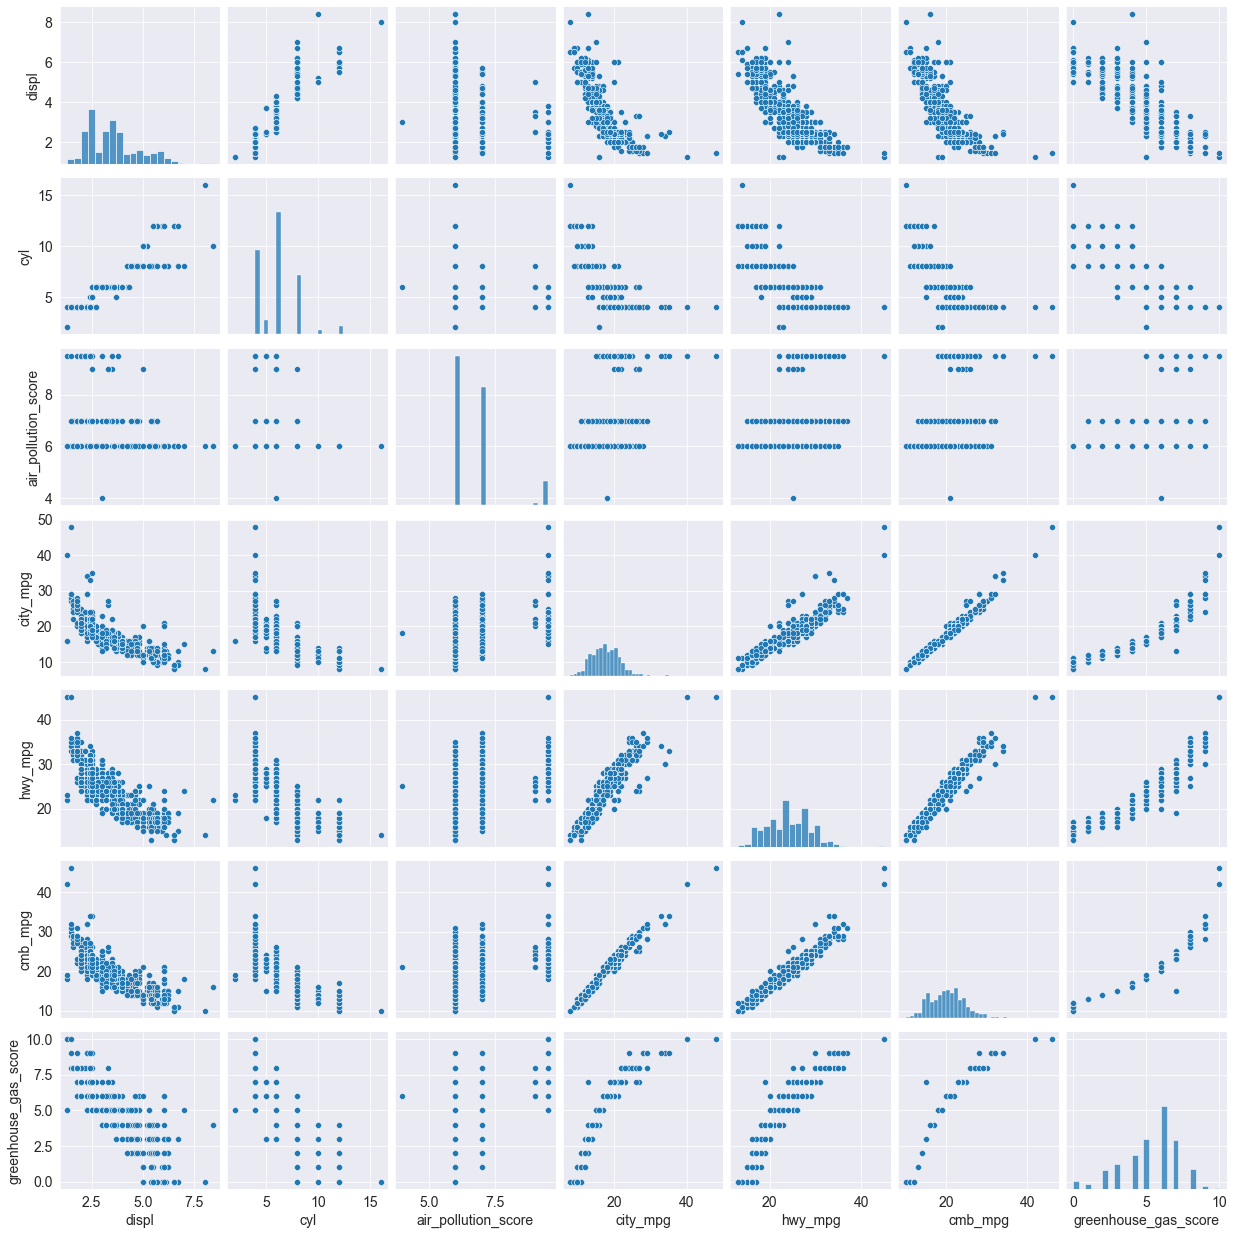

In [75]:
sns.pairplot(fuel_08);

From the pairplot above we can see that;

* Engine displacement and number of cylinders have a negative correlation with green house score with that of number of cylinders being a bit weaker.
* Combined, city and highway miles per gallon have a positive correlation with green houses score.
* Engine displacement and mpg have a negative correlation which means that the higher the engine displacement, the lower the mpg.

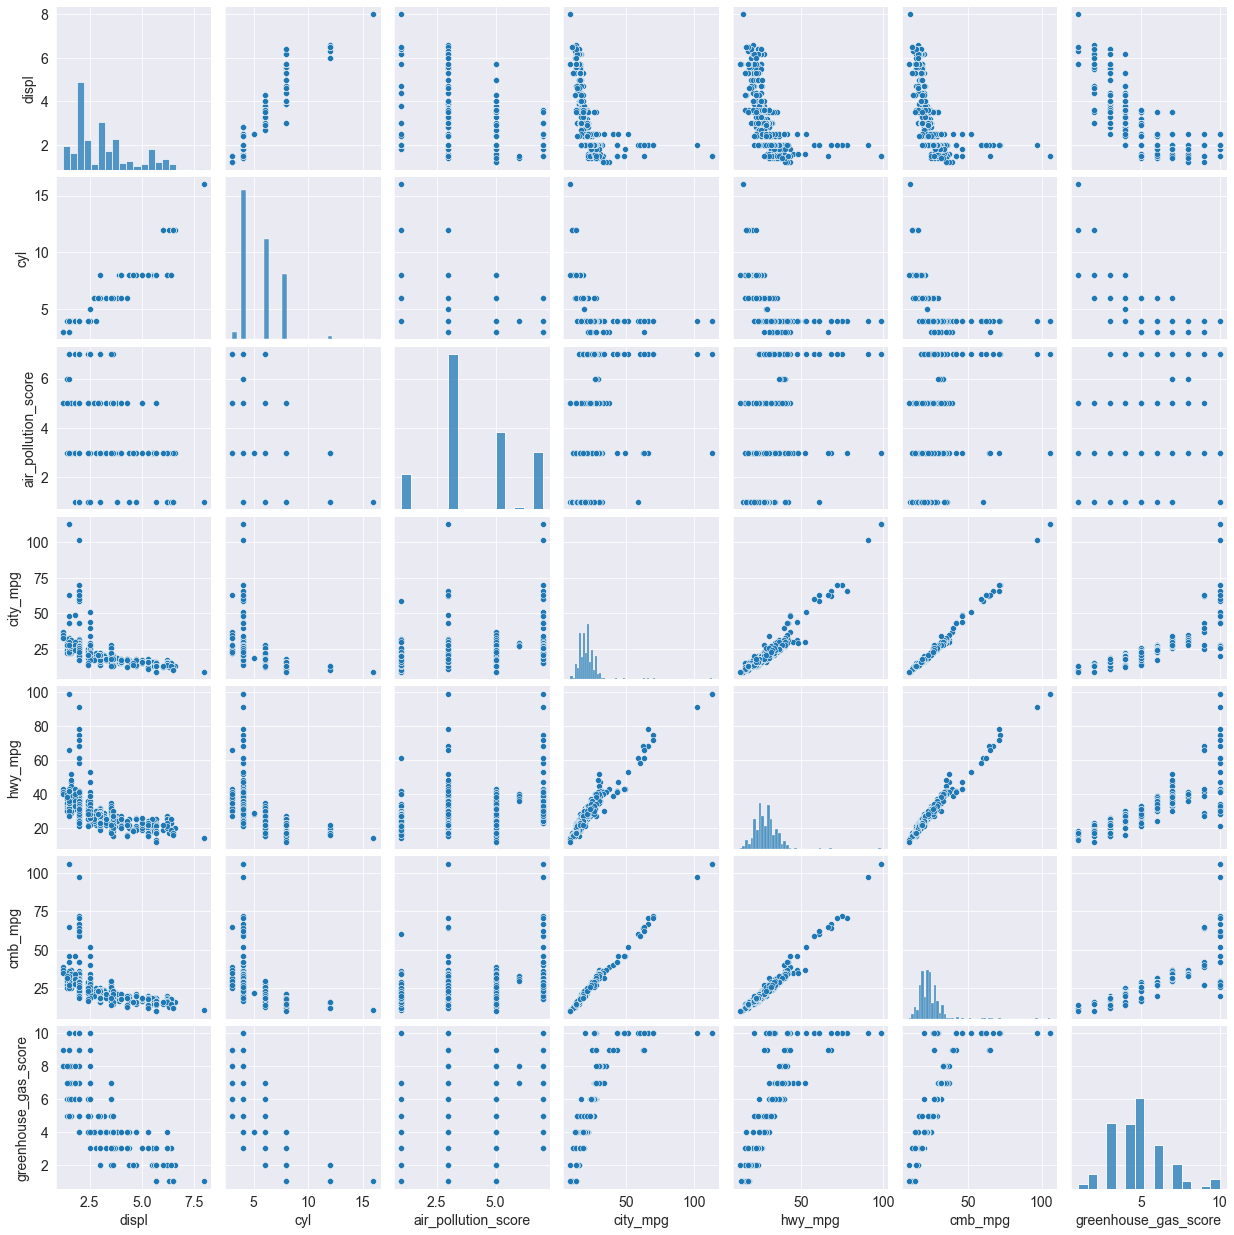

In [76]:
sns.pairplot(fuel_18);

In this pairplot, we can see that by 2018;

* The general negative correlation between displacement and mpg is a lot weaker.
* The general negative correlation between engine displacement and number of cylinders with greenhouse gas score.

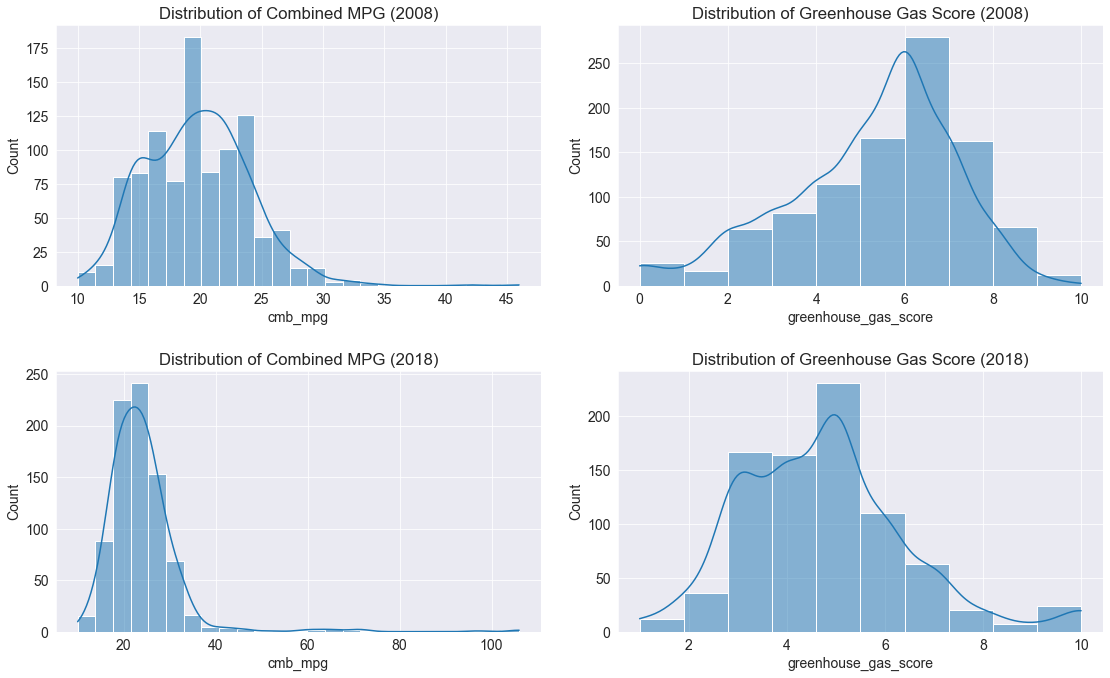

In [77]:
# we want to plot 4 figures at once. 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# visualizing `cmb_mpg` 2008
axes[0,0].set_title("Distribution of Combined MPG (2008)")
sns.histplot(fuel_08['cmb_mpg'], bins=25, kde=True, ax=axes[0,0]);

# visualizing `Greenhouse Gas Score` 2008
axes[0,1].set_title("Distribution of Greenhouse Gas Score (2008)")
sns.histplot(fuel_08['greenhouse_gas_score'], bins=10, kde=True, ax=axes[0,1]);

# visualizing `cmb_mpg` 2018
axes[1,0].set_title("Distribution of Combined MPG (2018)")
sns.histplot(fuel_18['cmb_mpg'], bins=25, kde=True, ax=axes[1,0]);

# visualizing `Greenhouse Gas Score` 2018
axes[1,1].set_title("Distribution of Greenhouse Gas Score (2018)")
sns.histplot(fuel_18['greenhouse_gas_score'], bins=10, kde=True, ax=axes[1,1]);

plt.tight_layout(pad=2)

From the above histograms, we can see that;

* The distribution for combined MPG was skewed to the right in 2008 and became much more skewed in 2018.
* The distribution of the greenhouse scores for 2008 was skewed to the left but that of 2018 is a bit skewed to the right.

**Q1: Are more unique models using alternative sources of fuel? By how much?**

Let's look at what the alternative sources of fuel are in each dataset.

In [78]:
fuel_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [79]:
fuel_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

For the 2008 dataset, the alternative sources of fuel are CNG (compressed natural gas) and ethanol while those for 2018 dataset are Ethanol and Electricity.

Now to find the unique models that are using these fuels.

In [80]:
# unique models in 2008 dataset using CNG and Ethanol
alt_08 = fuel_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [81]:
# unique models in 2018 dataset using Ethanol and Electricity
alt_18 = fuel_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

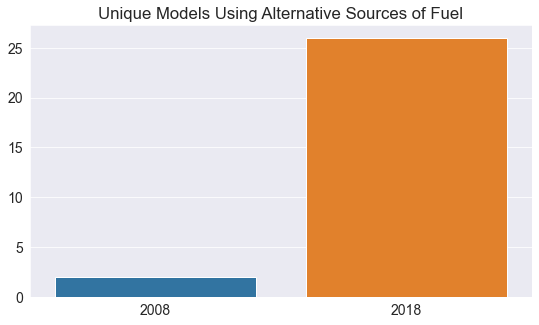

In [82]:
plt.title("Unique Models Using Alternative Sources of Fuel")
sns.barplot(x=['2008', '2018'],y=[alt_08, alt_18]);

Let's look plot the proportional difference too since most likely the number of unique models in each year will be different.

In [83]:
total_08 = fuel_08.model.nunique()
total_18 = fuel_18.model.nunique()
total_08, total_18

(377, 357)

In [84]:
prop_08 = alt_08 / total_08
prop_18 = alt_18 / total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

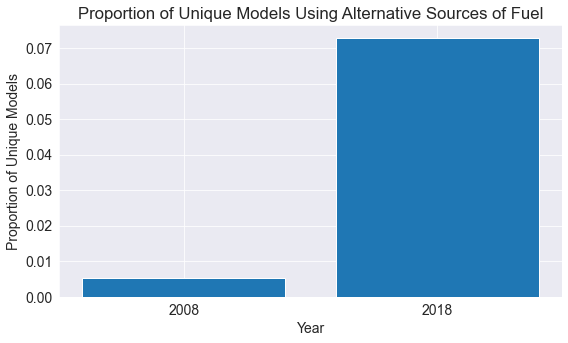

In [85]:
plt.title("Proportion of Unique Models Using Alternative Sources of Fuel")
plt.bar(x=["2008","2018"], height=[prop_08, prop_18])
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

In [86]:
# let's calculate the % difference
(alt_18 - alt_08) * 100 / alt_08

1200.0

We can see that more unique models adopted the use of alternative sources of fuel in 2018 as compared to 2008. In 2008, ethanol and compressed natural gas were the two alternative sources of fuel but as of 2018, CNG was dropped and electricty added.

**Q2: How much have vehicle classes improved in fuel economy?**

In [87]:
# fuel economy of vehicle classes in 2008
imp_08 = fuel_08.groupby("veh_class").mean().cmb_mpg

In [88]:
# fuel economy of vehicle classes in 2018
imp_18 = fuel_18.groupby("veh_class").mean().cmb_mpg

In [89]:
inc = (imp_18 - imp_08) * 100 / imp_08
inc.sort_values(ascending=False, inplace=True)
inc

veh_class
midsize car        29.084200
large car          26.473477
station wagon      23.082318
small car          20.449780
pickup             14.207899
minivan             8.800000
SUV                      NaN
small SUV                NaN
special purpose          NaN
standard SUV             NaN
van                      NaN
Name: cmb_mpg, dtype: float64

In [90]:
inc.dropna(inplace=True)
inc

veh_class
midsize car      29.084200
large car        26.473477
station wagon    23.082318
small car        20.449780
pickup           14.207899
minivan           8.800000
Name: cmb_mpg, dtype: float64

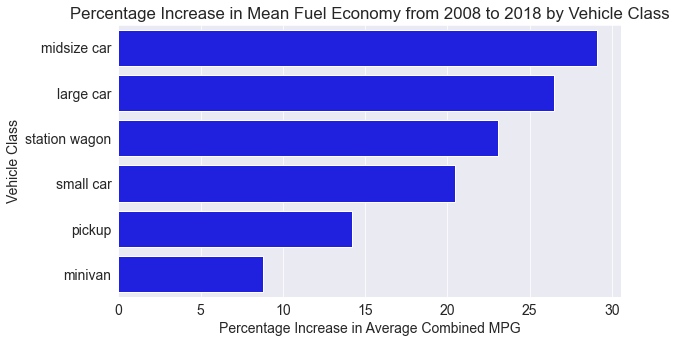

In [91]:
plt.title('Percentage Increase in Mean Fuel Economy from 2008 to 2018 by Vehicle Class')
sns.barplot(x=inc.values, y=inc.index, color='b')
plt.ylabel("Vehicle Class")
plt.xlabel("Percentage Increase in Average Combined MPG");

Most vehicle classes have seen noticeable improvements in fuel economy over the years with that of midsized cars seeing the largest average improvement of 29%, followed by large cars with 26.5% improved and minivans with the least improvement of 8.8%.

**Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?**

Each model year, EPA rates every new car, truck and SUV for greenhouse gas and smog-forming emissions (air pollution) on a scale of 1-10. For a vehicle to be SmartWay certified, it must receive a combined score from both scales that is much better than the average vehicle. 

> Greenhouse Gas Rating is one which reflects wehicle tailpipe emissions of carbon dioxide, the most prevalent greenhouse gas (GHG).

> SMOG Rating is a rating which reflects vehicle tailpipe emissions that contribute to local and regional air pollution, creating problems such as smog, haze and health issues

In [92]:
from PIL import Image

img08 = Image.open("smartway08.png")
img18 = Image.open("smartway18.png")

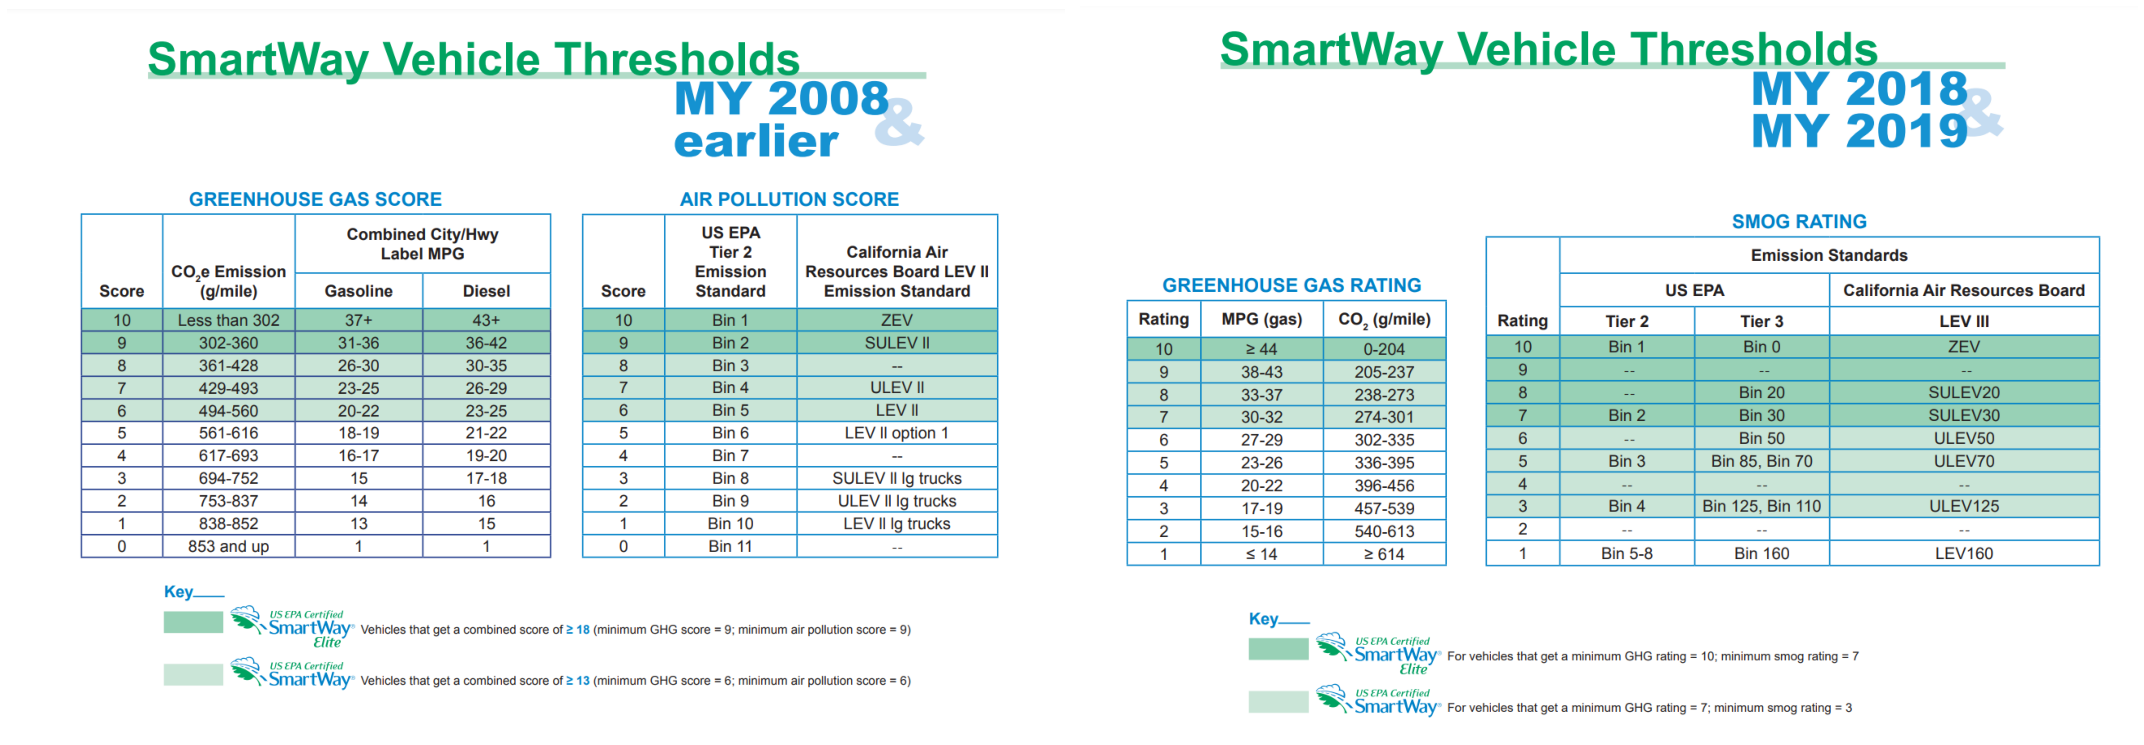

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(30,20))

axes[0].grid(False)
axes[0].axis('off')
axes[0].imshow(img08);

axes[1].grid(False)
axes[1].axis('off')
axes[1].imshow(img18);

plt.tight_layout()

For a vehicle to be certified as SmartWay in **2008**, it must have a **combined score of $\geq$ 13** (min GHG score = 6; minimum air pollution score = 6) while in **2018** it must have a **combined score of $\geq$ 10** (minimum GHG rating = 7; minimum air pollution score = 3).

Since we know that SmartWay certification is a factor of the combined score of GHG rating and smog rating, let's filter the SmartWay vehicles and analyze the data for both years.

In [94]:
# unique values in 'smartway' 2008
fuel_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [95]:
# get subset for SmartWay vehicles in 2008
smartway_08 = fuel_08.query("smartway == 'yes'")
smartway_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes
14,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes


In [96]:
smartway_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [97]:
# unique values in 'smartway' 2018
fuel_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [98]:
# get subset for SmartWay vehicles in 2018
smartway_18 = fuel_18.query("smartway in ['Yes', 'Elite']")
smartway_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
15,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,27.0,37.0,31.0,7,Yes
120,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,27.0,33.0,30.0,7,Yes
168,CHEVROLET Cruze,1.4,4,Man-6,2WD,Gasoline,small car,6.0,27.0,40.0,32.0,7,Yes
169,CHEVROLET Cruze,1.4,4,SemiAuto-6,2WD,Gasoline,small car,6.0,29.0,40.0,33.0,8,Yes
170,CHEVROLET Cruze,1.6,4,Auto-9,2WD,Diesel,small car,3.0,31.0,47.0,37.0,7,Yes


In [99]:
smartway_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In 2008, the average SmartWay vehicle had a combined score of approximately 14 while one in 2018 had a combined score of approximately 13.

Let's visualize the difference in the number of smartway vehicles between 2008 and 2018.

In [100]:
smartway_08_count = smartway_08['smartway'].count()
smartwayPCT_08 = smartway_08_count * 100 / fuel_08.smartway.count()
print("Number of SmartWay vehicles in 2008: {}".format(smartway_08_count))
print("Percentage of SmartWay vehicles in 2008: {:.2f}%".format(smartwayPCT_08))

Number of SmartWay vehicles in 2008: 380
Percentage of SmartWay vehicles in 2008: 38.50%


In [101]:
smartway_18_count = smartway_18['smartway'].count()
smartwayPCT_18 = smartway_18_count * 100 / fuel_18.smartway.count()
print("Number of SmartWay vehicles in 2018: {}".format(smartway_18_count))
print("Percentage of SmartWay vehicles in 2018: {:.2f}%".format(smartwayPCT_18))

Number of SmartWay vehicles in 2018: 108
Percentage of SmartWay vehicles in 2018: 12.98%


In [102]:
pctDrop = (smartwayPCT_18 - smartwayPCT_08) * 100/ smartwayPCT_08
pctDrop

-66.28415991902834

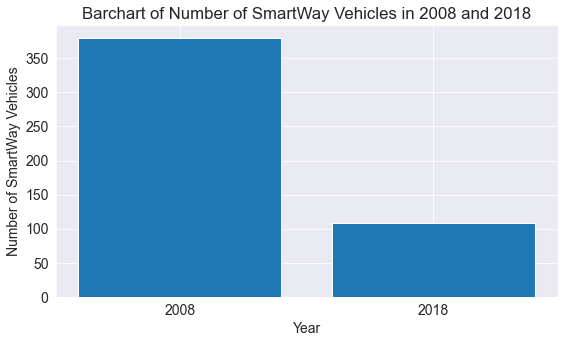

In [103]:
plt.bar(["2008","2018"], [smartway_08_count, smartway_18_count])
plt.title('Barchart of Number of SmartWay Vehicles in 2008 and 2018')
plt.xlabel("Year")
plt.ylabel("Number of SmartWay Vehicles");

There are 380 SmartWay vehicles in 2008 (38% of sampled 987 cars) and only 108 SmartWay vehicles (13% of sampled 832 cars), which is approximated a 66% reduction in SmartWay certified vehicles by 2018. What could be the cause?

Let's analyse the average greenhouse gas and air pollution scores for both years.

In [104]:
# GHG and airpollution mean for 2008
smartMean_08 = smartway_08[['greenhouse_gas_score', 'air_pollution_score']].mean()
smartMean_08

greenhouse_gas_score    6.868421
air_pollution_score     7.365789
dtype: float64

In [105]:
# GHG and airpollution mean for 2018
smartMean_18 = smartway_18[['greenhouse_gas_score', 'air_pollution_score']].mean()
smartMean_18

greenhouse_gas_score    7.925926
air_pollution_score     5.212963
dtype: float64

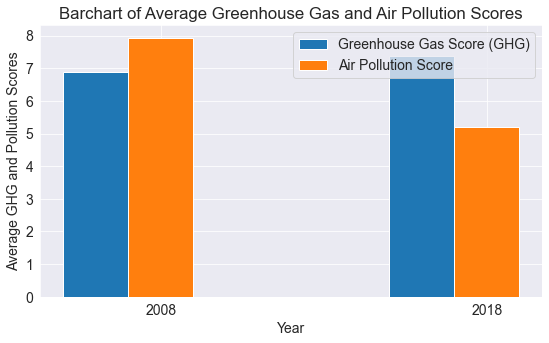

In [106]:
# plotting barchart
x = np.arange(2)  # results in np.array([0,1])
width = 0.2

# plot bar for smartMean_08
plt.bar(x=x-0.2, height=smartMean_08, width=0.2)
# plot bar for smartMean_18
plt.bar(x, smartMean_18, width)
plt.title("Barchart of Average Greenhouse Gas and Air Pollution Scores")
plt.xticks(x, ["2008", "2018"])
plt.xlabel("Year")
plt.ylabel("Average GHG and Pollution Scores")
plt.legend(['Greenhouse Gas Score (GHG)', 'Air Pollution Score']);

Notice from the plot that the average GHG score increased (6.9 to 7.9) while the air pollution decreased (7.4 to 5.2) when comparing values of 2008 to 2018. What could be the cause of this decrease in smog rating?

From the [EPA website](https://www.epa.gov/greenvehicles/smog-rating), it can be found that the smog rating chart for model year 2018 and later got recalibrated to reflect new, more stringent Tier 3 emission standards. This recalibration makes better use of the entire smog rating scale and allows for more useful comparisons between vehicles. 
> Note: Even though ratings appear to be going down, vehicles are not getting dirtier. A MY 2018 and later smog rating of 3 is about the same as a MY 2017 smog rating of 6.

This explains the drop in air pollution scores.

**Q4: What features area associated with better fuel economy?**

The features associated with better fuel economy are city fuel economy (`city_mpg`), highway fuel economy (`hwy_mpg`) and combined city & fuel mpg (`cmb_mpg`). We'll focus on `cmb_mpg`.

Vehicles with "better fuel economy" can be seen as vehicles which have an above average combined mpg. Therefore, let's filter out data with the `cmb_mpg` feature higher than the mean.

In [107]:
mpg_better_08 = fuel_08.query('cmb_mpg > cmb_mpg.mean()')
mpg_better_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
6,ACURA TSX,2.4,4,Man-6,2WD,Gasoline,small car,6.0,19.0,28.0,22.0,6,no
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes


Percentage of models in the 2008 dataset that have a better fuel economy

In [108]:
mpg_betterPCT_08 =  mpg_better_08.model.nunique() * 100 / fuel_08.model.nunique()
print("{:.2f}% of unique models in 2008 dataset have a better fuel economy.".format(mpg_betterPCT_08))

49.87% of unique models in 2008 dataset have a better fuel economy.


Let's have a look at the descriptive statistics for this dataset.

In [109]:
mpg_better_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [110]:
mpg_better_18 = fuel_18.query('cmb_mpg > cmb_mpg.mean()')
mpg_better_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
7,ALFA ROMEO 4C,1.8,4,AutoMan-6,2WD,Gasoline,small car,1.0,24.0,34.0,28.0,6,No
9,AUDI A3,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
10,AUDI A3,2.0,4,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
11,AUDI A3 Cabriolet,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,22.0,30.0,25.0,5,No


In [111]:
mpg_better_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [112]:
mpg_betterPCT_18 =  mpg_better_18.model.nunique() * 100 / fuel_18.model.nunique()
print("{:.2f}% of unique models in 2018 dataset have a better fuel economy.".format(mpg_betterPCT_18))

45.10% of unique models in 2018 dataset have a better fuel economy.


Let's visualize the combined mpg for 2008 and 2018 with boxplots.

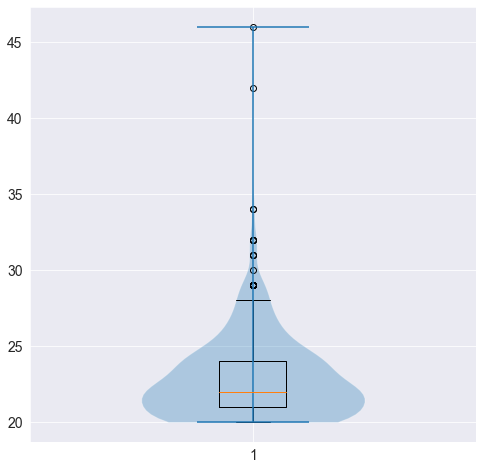

In [113]:
plt.figure(figsize=(8,8))
plt.boxplot(mpg_better_08.cmb_mpg)
plt.violinplot(mpg_better_08.cmb_mpg);

The 2008 boxplot is showing a righ skewed distribution with 75% of vehicles withn the mean combined mpg of 23. Several outliers can be noticed.

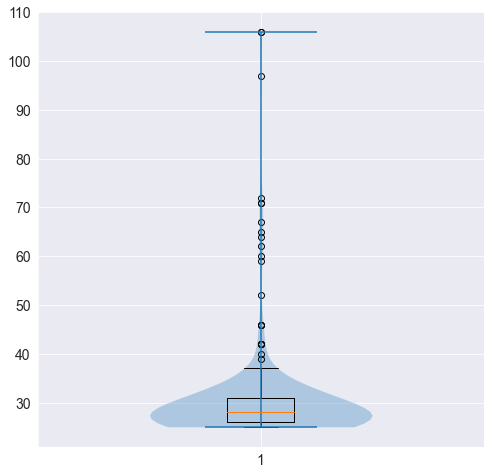

In [114]:
plt.figure(figsize=(8,8))
plt.boxplot(mpg_better_18.cmb_mpg)
plt.violinplot(mpg_better_18.cmb_mpg);

This boxplot shows the 2018 dataset to have a large number of outliers for the combined mpg feature. This means that these cars are capable of travelling longer distances with the same amount of fuel. Still, 75% of vehicles fall within the 25 to 30 score. 

**Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?**

This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. To do this, let's first merge our dataframes on **`model`** .

* Firstly, we'll rename 2008 columns to distinguish from 2018 columns after the merge.

In [115]:
fuel_08.rename(columns=(lambda x: x[:10] + "_2008"), inplace=True)
fuel_08

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
983,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
984,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,SUV,7.0,13.0,19.0,15.0,3,no
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no


* Perform inner merge with left on `model_2008` and the right on `model`.

In [116]:
fuel_comb = pd.merge(left=fuel_08, right=fuel_18, how="inner", 
                     left_on="model_2008", right_on="model")
fuel_comb.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [117]:
fuel_comb.shape

(922, 26)

Our new merged dataframe has 922 samples and 26 columns.

* Create a new dataframe that contains the mean combined mpg values in 2008 and 2018 for each unique model.

In [118]:
uniqueModel = fuel_comb.groupby("model_2008").mean()

# changing index of uniqueModel
uniqueModel.reset_index(inplace=True)

# creating df with only combined mpg columns and model names
model_mpg = uniqueModel[["model_2008", "cmb_mpg_2008", "cmb_mpg"]]
model_mpg.head()

,model_2008,cmb_mpg_2008,cmb_mpg
0,ACURA RDX,19.000000,22.500000
1,AUDI A3,23.333333,28.000000
2,AUDI A4,21.000000,27.000000
3,AUDI A6,19.666667,25.666667
4,AUDI A8 L,16.500000,22.000000


In [119]:
# suppressing the SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# create a new column for the change in mpg
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
print(model_mpg.shape)
model_mpg.head()

(72, 4)


,model_2008,cmb_mpg_2008,cmb_mpg,mpg_change
0,ACURA RDX,19.000000,22.500000,3.500000
1,AUDI A3,23.333333,28.000000,4.666667
2,AUDI A4,21.000000,27.000000,6.000000
3,AUDI A6,19.666667,25.666667,6.000000
4,AUDI A8 L,16.500000,22.000000,5.500000


In [120]:
# checking if the merge was done well
# lets find how many of the models in 2008 are also in 2018 dataset
s1 = fuel_08.model_2008.unique()
s2 = fuel_18.model.unique()
pd.Series(np.intersect1d(s1,s2)).count()

72

* Let's find the top 15 models that have improved in mpg since 2008

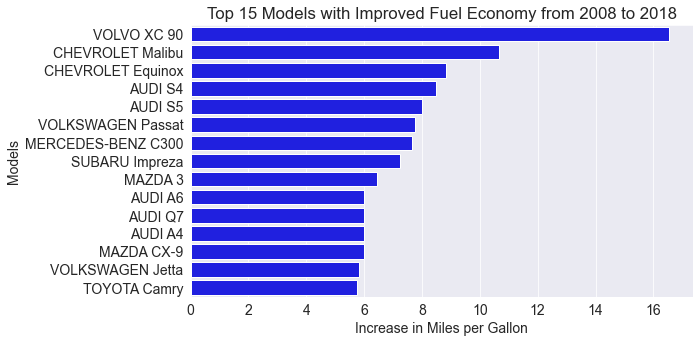

In [121]:
data = model_mpg.sort_values(by="mpg_change", ascending=False, ignore_index=True).head(15)

plt.title('Top 15 Models with Improved Fuel Economy from 2008 to 2018')
sns.barplot(x=data.mpg_change, y=data.model_2008, color='blue')
plt.ylabel("Models")
plt.xlabel("Increase in Miles per Gallon");

Let's see the average percentage increase in MPG

In [122]:
pct_increase = model_mpg.drop(["model_2008","mpg_change"], axis=1).pct_change(axis="columns")

In [123]:
model_mpg['pct_increase'] = pct_increase['cmb_mpg'] * 100

In [124]:
# average percentage increase
print("{:.2f}%".format(model_mpg.pct_increase.mean()))

19.88%


In [125]:
# vehicle with highest percentage increase
model_mpg.sort_values(by="pct_increase", ascending=False).head(1)

,model_2008,cmb_mpg_2008,cmb_mpg,mpg_change,pct_increase
71,VOLVO XC 90,15.666667,32.2,16.533333,105.531915


Number of vehicles with an increase in combined mpg.

In [126]:
model_mpg.query("mpg_change > 0")["model_2008"].count()

66

## Conclusion
Let's revisit the questions at the beginning

#### Q1: Are more models using alternative sources of fuel? By how much?
We can see that more unique models adopted the use of alternative sources of fuel in 2018 as compared to 2008 and we measured a 1200% increase (2008: 2 models; 2018: 26 models). 

In 2008, ethanol and compressed natural gas were the two alternative sources of fuel but as of 2018, CNG was dropped and electricty added. 
#### Q2: How much have vehicle classes improved in fuel economy?
Most vehicle classes have seen noticeable improvements in fuel economy over the years with that of midsized cars seeing the largest average improvement of 29%, followed by large cars with 26.5% improved and minivans with the least improvement of 8.8%.
#### Q3: What are the characteristics of SmartWay vehicles?
It was found that the characteristics of SmartWay vehicles were determined by their combined greenhouse gas scores and air pollution scores (smog rating) based on a rating released each year.

From our dataset, there are 380 SmartWay vehicles in 2008 (38% of sampled 987 cars) and only 108 SmartWay vehicles (13% of sampled 832 cars), which is approximated a 66% reduction in SmartWay certified vehicles by 2018. 

When the average GHG and air pollution scores were plotted for 2008 and 2018, it was found that while the average GHG score increased (6.9 to 7.9) the air pollution score decreased (7.4 to 5.2) when comparing values of 2008 to 2018.

The cause of the drop in air pollution score in 2018 was found to be the recalibration of the smog rating chart for year 2018 and later to reflect the more Tier 3 emission standards. This can be seen on the [EPA website](https://www.epa.gov/greenvehicles/smog-rating).

This means that even though ratings appear to be going down, vehicles are not getting dirtier. A MY 2018 and later smog rating of 3 is about the same as a MY 2017 smog rating of 6.
#### Q4: What features are associated with better fuel economy?
The features associated with better fuel economy are city fuel economy (`city_mpg`), highway fuel economy (`hwy_mpg`) and combined city & fuel mpg (`cmb_mpg`). This analysis focused on `cmb_mpg`.

Vehicles with 'better fuel economy' were defined as vehicles with a combined city & fuel mpg greater than average. By this scale, 49.87% of the unique vehicles in the 2008 dataset had a better fuel economy while 45.10% of the unique vehicles in the 2018 had a better fuel economy.
#### For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?
There were 72 models that were still produced in 2018 and at least 92%, or 66 vehicles have improvements in MPG averaged at 19.88%. VOLVO XC 90 model made the highest improvements at 105.5%!